In [1]:
import pandas as pd

df = pd.read_csv("/Users/levankikadze/Desktop/cherningUsers/Data/UserOrdersTotal_past1yr.csv", index_col=0)

In [22]:
df.head()

,User ID,Order Created Date,Order ID,"Campaigns Discount, $"
70245,246858170,2025-07-22,248561451,$0.00
82867,106992646,2025-07-22,248560305,$0.00
696931,256883052,2025-07-22,248558534,$24.00
696922,94678452,2025-07-22,248563233,$0.00
696916,132702024,2025-07-22,248552592,$0.00


In [2]:
df.sort_values(by='Order Created Date', ascending=False, inplace=True)

In [27]:
latest_order_dates = df.drop_duplicates(subset='User ID', keep='first')
latest_order_dates.head()

,User ID,Order Created Date,Order ID,"Campaigns Discount, $"
70245,246858170,2025-07-22,248561451,$0.00
82867,106992646,2025-07-22,248560305,$0.00
696931,256883052,2025-07-22,248558534,$24.00
696922,94678452,2025-07-22,248563233,$0.00
696916,132702024,2025-07-22,248552592,$0.00


In [36]:
import numpy as np
from datetime import datetime

# Ensure 'Order Created Date' is datetime
latest_order_dates['Order Created Date'] = pd.to_datetime(latest_order_dates['Order Created Date'])

# Calculate days since last order
today = pd.Timestamp(datetime.today().date())
latest_order_dates['days_since_last_order'] = (today - latest_order_dates['Order Created Date']).dt.days

# Define bins and labels
bins = [0, 30, 60, 90, 120, np.inf]
labels = ['0-30 days', '31-60 days', '61-90 days', '91-120 days', '120+ days']

# Categorize users
latest_order_dates['order_recency'] = pd.cut(latest_order_dates['days_since_last_order'], bins=bins, labels=labels, right=True)

# Count users in each group
recency_counts = latest_order_dates['order_recency'].value_counts().sort_index()
print(recency_counts)

order_recency
0-30 days      50684
31-60 days     25152
61-90 days     20540
91-120 days    15453
120+ days      34209
Name: count, dtype: int64


/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_16074/1858078166.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_order_dates['Order Created Date'] = pd.to_datetime(latest_order_dates['Order Created Date'])
/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_16074/1858078166.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_order_dates['days_since_last_order'] = (today - latest_order_dates['Order Created Date']).dt.days
/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ip

used_discount  False  True 
order_recency              
0-30 days      14210  36474
31-60 days      6800  18352
61-90 days      5284  15256
91-120 days     4298  11155
120+ days      10255  23954


/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_16074/1492299238.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_order_dates['Order Created Date'] = pd.to_datetime(latest_order_dates['Order Created Date'])
/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_16074/1492299238.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_order_dates['days_since_last_order'] = (today - latest_order_dates['Order Created Date']).dt.days
/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ip

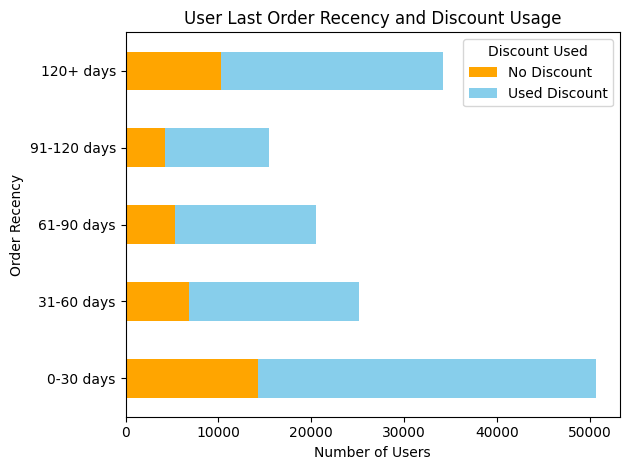

In [48]:
import matplotlib.pyplot as plt

# Ensure 'order_recency' column exists
if 'order_recency' not in latest_order_dates.columns:
	bins = [0, 30, 60, 90, 120, np.inf]
	labels = ['0-30 days', '31-60 days', '61-90 days', '91-120 days', '120+ days']
	latest_order_dates['Order Created Date'] = pd.to_datetime(latest_order_dates['Order Created Date'])
	latest_order_dates['days_since_last_order'] = (today - latest_order_dates['Order Created Date']).dt.days
	latest_order_dates['order_recency'] = pd.cut(latest_order_dates['days_since_last_order'], bins=bins, labels=labels, right=True)

latest_order_dates['Campaigns Discount, $'] = latest_order_dates['Campaigns Discount, $'].replace(r'[\$,]', '', regex=True).astype(float)

latest_order_dates.loc[:, 'used_discount'] = latest_order_dates['Campaigns Discount, $'] > 0

# Group by order_recency and discount usage, then count
discount_counts = latest_order_dates.groupby(['order_recency', 'used_discount'], observed=True).size().unstack(fill_value=0)
print(discount_counts)


discount_counts.plot(kind='barh', stacked=True, color=['orange', 'skyblue'])
plt.title('User Last Order Recency and Discount Usage')
plt.xlabel('Number of Users')
plt.ylabel('Order Recency')
plt.legend([ 'No Discount', 'Used Discount', ], title='Discount Used')
plt.tight_layout()
plt.show()